**непараметрическая регрессия**

Евгений Борисов esborisov@sevsu.ru

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

---

In [3]:
# генерируем набор данных
n_samples=500
X = np.linspace(-1,2,n_samples).reshape(-1,1)
y = np.sin(X*2.9)+np.cos(X*5.9)+rng.rand(n_samples).reshape(-1,1)
X.shape,y.shape

((500, 1), (500, 1))

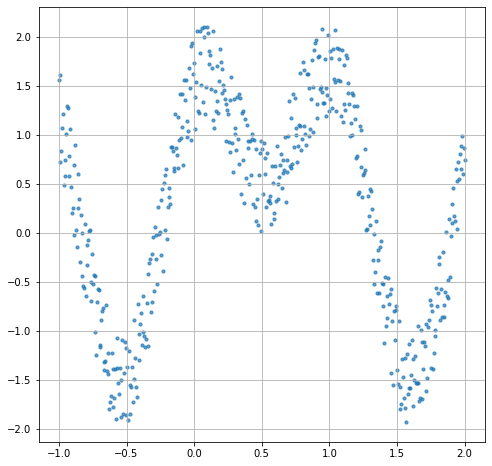

In [4]:
# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
plt.show()


---

непараметрическая регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

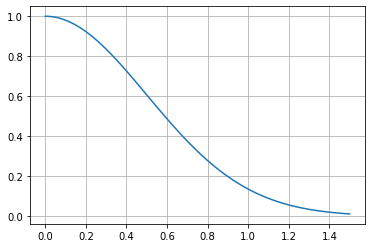

In [5]:
# # прямоугольное ядро
# def K(x): return np.abs(x)<=1.0

# # треугольное ядро
# def K(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
#def K(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def K(x): return np.exp(-2.0*np.square(x))

x = np.linspace(0.0,1.5,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

---

In [6]:
# точки, для которых будем считать регрессию
n = n_samples//10 # количество
u = np.linspace(X.min(),X.max(),n).reshape(-1,1)
u.shape

(50, 1)

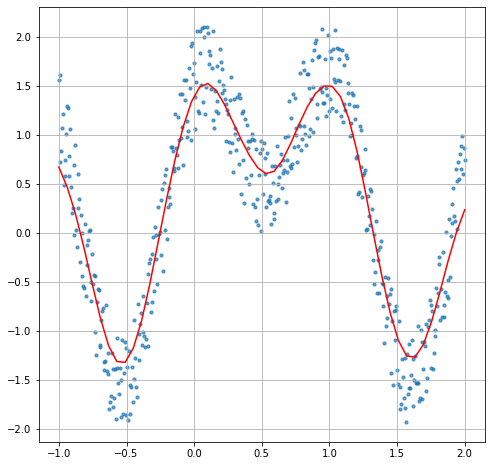

In [7]:
from sklearn.metrics import pairwise_distances

r=pairwise_distances(u,X,metric='euclidean') 
h = .2 # ширина окна, влияет на точность аппроксимации
w = K(r/h) # ядро влияет на на гладкость аппроксимации
z = (y.T*w).sum(axis=1)/w.sum(axis=1) # значение регресии для точки u

# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,z,c='r') # точки учебного набора
plt.grid()
plt.show()